In [1]:
import sys
sys.path.insert(0, '../..')
import allel; print('allel', allel.__version__)
import h5py
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
allel.chunked.storage_registry['default'] = allel.chunked.storage_zarr.zarrmem_storage

allel 0.22.0.dev0


In [2]:
callset_dir = '/kwiat/2/coluzzi/ag1000g/data/phase1/release/AR3/variation/crosses/ar3/hdf5/'

In [3]:
!ls -lh {callset_dir}

total 26G
-r--r--r-- 1 aliman aliman 7.5G Apr 23  2015 ag1000g.crosses.phase1.ar3sites.2L.h5
-r--r--r-- 1 aliman aliman   81 Jul 15  2015 ag1000g.crosses.phase1.ar3sites.2L.h5.md5
-r--r--r-- 1 aliman aliman 8.6G Apr 23  2015 ag1000g.crosses.phase1.ar3sites.2R.h5
-r--r--r-- 1 aliman aliman   81 Jul 15  2015 ag1000g.crosses.phase1.ar3sites.2R.h5.md5
-r--r--r-- 1 aliman aliman 4.0G Apr 23  2015 ag1000g.crosses.phase1.ar3sites.pass.2L.h5
-r--r--r-- 1 aliman aliman   86 Jul 15  2015 ag1000g.crosses.phase1.ar3sites.pass.2L.h5.md5
-r--r--r-- 1 aliman aliman 5.4G Apr 23  2015 ag1000g.crosses.phase1.ar3sites.pass.2R.h5
-r--r--r-- 1 aliman aliman   86 Jul 15  2015 ag1000g.crosses.phase1.ar3sites.pass.2R.h5.md5


In [4]:
chrom = '2L'
callset = h5py.File(
    os.path.join(callset_dir, 'ag1000g.crosses.phase1.ar3sites.pass.2L.h5'),
    mode='r'
)
callset

<HDF5 file "ag1000g.crosses.phase1.ar3sites.pass.2L.h5" (mode r)>

In [5]:
samples = list(callset['2L']['samples'][:])
samples[:10]

[b'AD0231-C',
 b'AD0232-C',
 b'AD0234-C',
 b'AD0235-C',
 b'AD0236-C',
 b'AD0237-C',
 b'AD0238-C',
 b'AD0239-C',
 b'AD0240-C',
 b'AD0241-C']

In [6]:
samples_29_2 = samples[:22]
samples_29_2

[b'AD0231-C',
 b'AD0232-C',
 b'AD0234-C',
 b'AD0235-C',
 b'AD0236-C',
 b'AD0237-C',
 b'AD0238-C',
 b'AD0239-C',
 b'AD0240-C',
 b'AD0241-C',
 b'AD0242-C',
 b'AD0243-C',
 b'AD0244-C',
 b'AD0245-C',
 b'AD0246-C',
 b'AD0247-C',
 b'AD0248-C',
 b'AD0249-C',
 b'AD0250-C',
 b'AD0251-C',
 b'AD0252-C',
 b'AD0253-C']

In [7]:
genotype = allel.GenotypeChunkedArray(callset['2L']['calldata']['genotype'])
genotype

,0,1,2,3,4,...,75,76,77,78,79
0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0
1,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0
2,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0
3,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0
4,1/1,0/0,0/1,0/1,0/1,...,0/1,0/1,0/1,0/1,0/0


In [8]:
# take samples from a single cross
samples_cross = [samples.index(s) for s in samples_29_2]
genotype_cross = genotype.take(samples_cross, axis=1)
genotype_cross

,0,1,2,3,4,...,17,18,19,20,21
0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0
1,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0
2,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0
3,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0
4,1/1,0/0,0/1,0/1,0/1,...,0/1,0/1,0/1,0/1,0/1


## New workflow

In [9]:
ac_cross = genotype_cross.count_alleles()[:]
ac_cross

,0,1,2,3
0,44,0,0,0
1,44,0,0,0
2,44,0,0,0
3,44,0,0,0
4,22,22,0,0


In [10]:
genotype_cross_seg = genotype_cross.compress(ac_cross.is_segregating(), axis=0)
genotype_cross_seg

,0,1,2,3,4,...,17,18,19,20,21
0,1/1,0/0,0/1,0/1,0/1,...,0/1,0/1,0/1,0/1,0/1
1,1/1,0/0,0/1,0/1,0/1,...,0/1,0/1,0/1,0/1,0/1
2,0/1,0/0,0/0,0/1,0/1,...,0/1,0/0,0/1,0/1,0/0
3,1/1,0/0,0/0,0/1,0/1,...,0/1,0/0,0/1,0/1,0/0
4,0/1,0/0,0/0,0/1,0/1,...,0/1,0/0,0/1,0/1,0/0


In [11]:
genotype_phased, is_phased = allel.stats.phase_by_transmission(genotype_cross_seg, window_size=100, copy=True)
genotype_phased

,0,1,2,3,4,...,17,18,19,20,21
0,1/1,0/0,1/0,1/0,1/0,...,1/0,1/0,1/0,1/0,1/0
1,1/1,0/0,1/0,1/0,1/0,...,1/0,1/0,1/0,1/0,1/0
2,0/1,0/0,0/0,1/0,1/0,...,1/0,0/0,1/0,1/0,0/0
3,1/1,0/0,0/0,1/0,1/0,...,1/0,0/0,1/0,1/0,0/0
4,0/1,0/0,0/0,1/0,1/0,...,1/0,0/0,1/0,1/0,0/0


In [12]:
is_phased

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [13]:
# check how many genotypes got phased
np.count_nonzero(is_phased), is_phased.size

(14106128, 14853784)

In [14]:
def plot_inheritance(g, is_phased, parent):

    # paint inheritance
    inh = allel.stats.paint_transmission(
        g[:, parent], 
        np.column_stack([
            g[:, parent],  # include parent
            g[:, 2:, parent]
        ])
    )

    # fix where phase is unknown
    inh[:, 0:2][~is_phased[:, parent]] = 0
    inh[:, 2:][~is_phased[:, 2:]] = 0

    # take a look...
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.pcolormesh(inh.T, 
                  cmap=mpl.colors.ListedColormap(['gray', 'r', 'b', 'orange', 'g', 'k', 'w', 'w']),
                  vmin=0, vmax=7)
    ax.set_yticks(np.arange(inh.shape[1])+.5)
    ax.set_yticklabels(np.arange(inh.shape[1]))
    ax.autoscale(axis='both', tight=True)    

    

In [15]:
parent_is_het = genotype_cross_seg[:, :2].is_het()
parent_is_het

array([[False, False],
       [False, False],
       [ True, False],
       ..., 
       [ True, False],
       [ True, False],
       [ True, False]], dtype=bool)

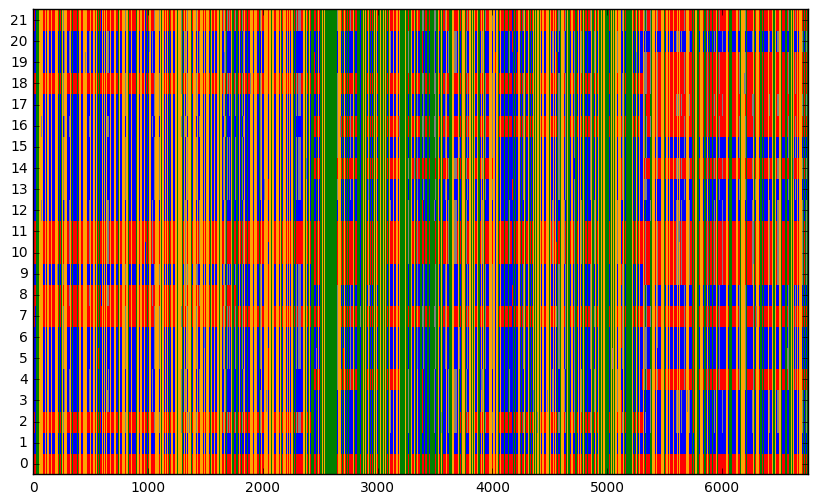

In [16]:
plot_inheritance(genotype_phased[::100], is_phased[::100], parent=0)

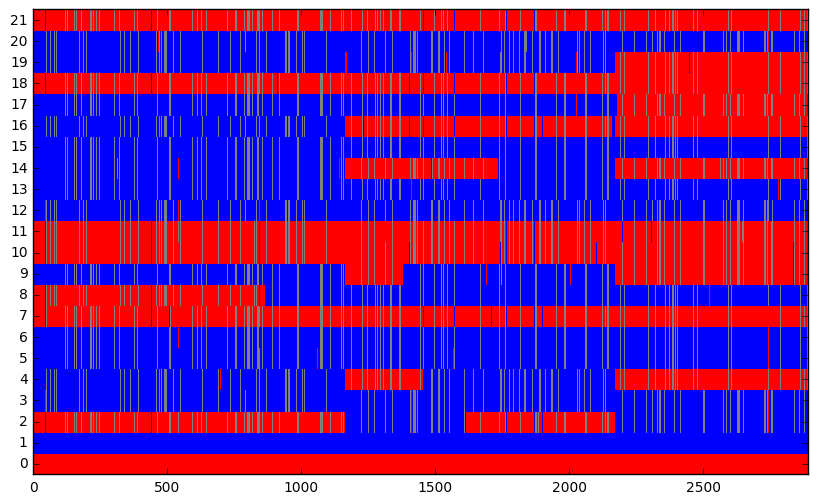

In [17]:
flt = parent_is_het[:, 0]
plot_inheritance(genotype_phased[flt][::100], is_phased[flt][::100], parent=0)

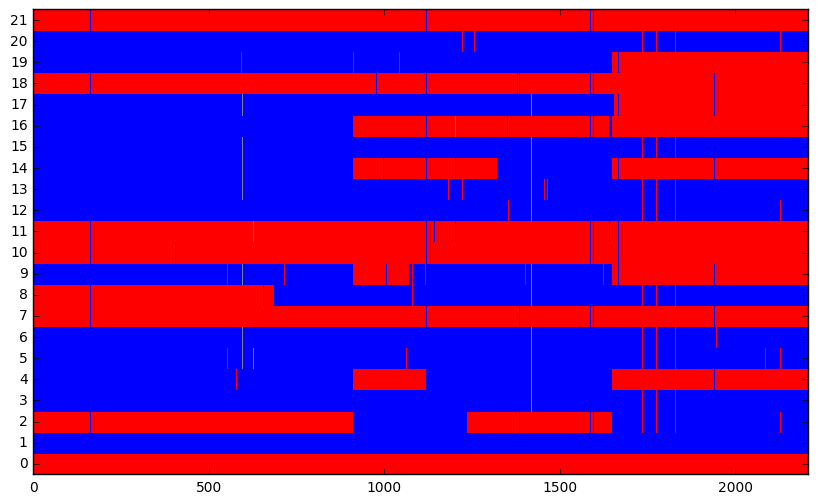

In [18]:
flt = parent_is_het[:, 0] & ~parent_is_het[:, 1]
plot_inheritance(genotype_phased[flt][::100], is_phased[flt][::100], parent=0)

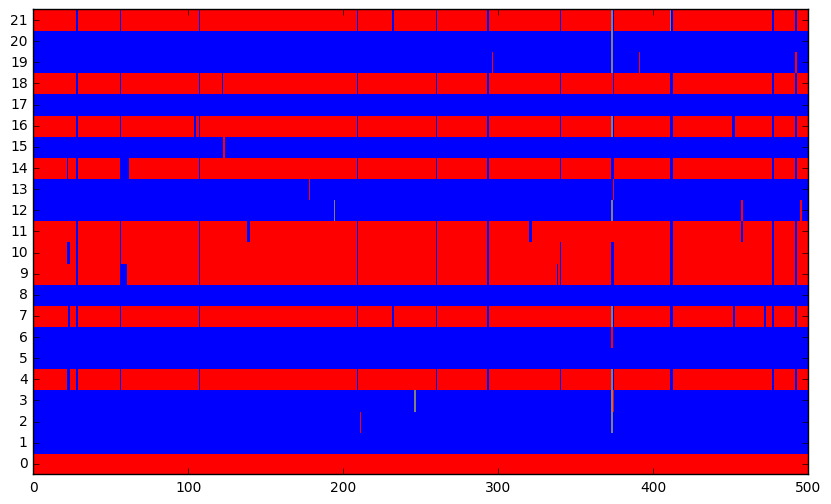

In [19]:
flt = parent_is_het[:, 0] & ~parent_is_het[:, 1]
plot_inheritance(genotype_phased[flt][100000:100500], is_phased[flt][100000:100500], parent=0)

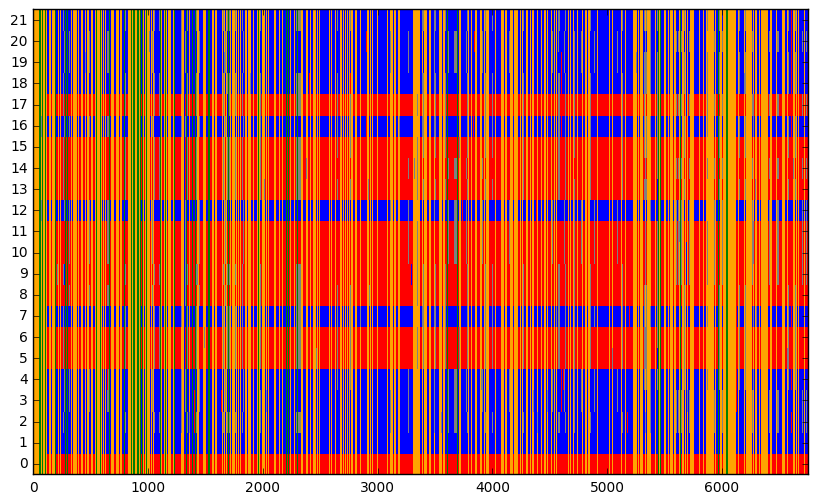

In [20]:
plot_inheritance(genotype_phased[::100], is_phased[::100], parent=1)

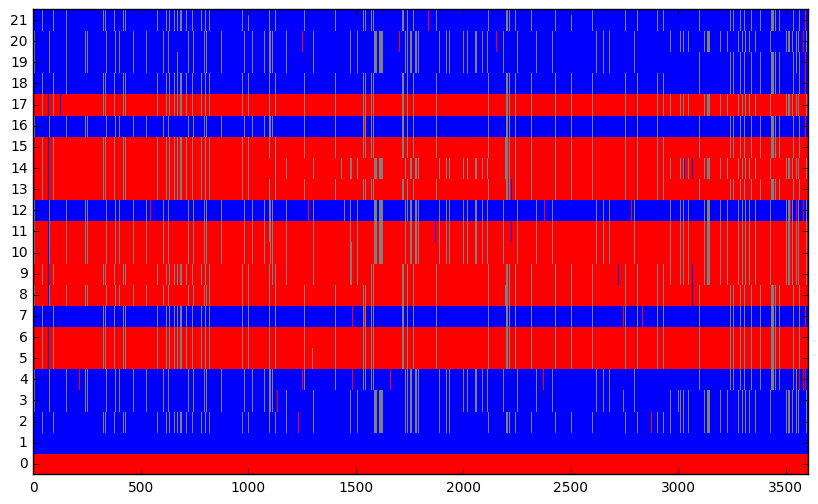

In [21]:
flt = parent_is_het[:, 1]
plot_inheritance(genotype_phased[flt][::100], is_phased[flt][::100], parent=1)

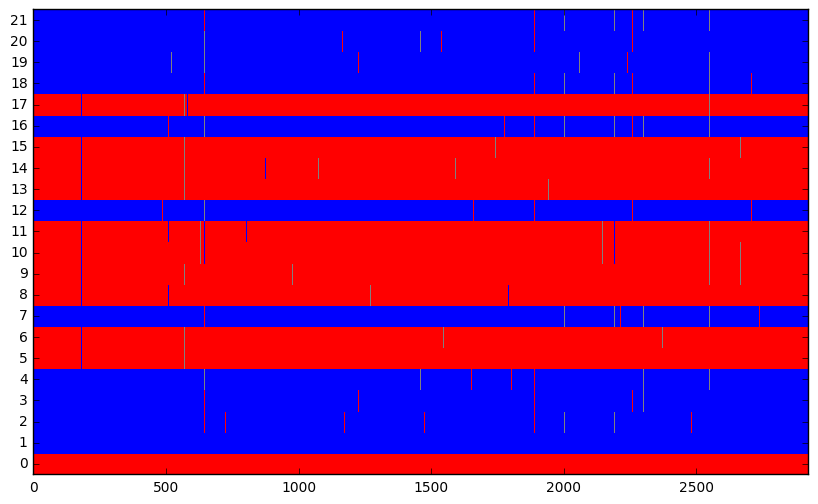

In [22]:
flt = parent_is_het[:, 1] & ~parent_is_het[:, 0]
plot_inheritance(genotype_phased[flt][::100], is_phased[flt][::100], parent=1)

## Legacy workflow

In [23]:
# take only the parental genotypes
genotype_cross_parents = genotype_cross.take([0, 1], axis=1)[:]
genotype_cross_parents

,0,1
0,0/0,0/0
1,0/0,0/0
2,0/0,0/0
3,0/0,0/0
4,1/1,0/0


In [24]:
# find heterozygous genotypes in the parents
is_het_parents = genotype_cross_parents.is_het()
is_het_parents

array([[False, False],
       [False, False],
       [False, False],
       ..., 
       [False, False],
       [False, False],
       [False, False]], dtype=bool)

In [25]:
# select variants where maternal genotype is het
g_mat_het = genotype_cross.compress(is_het_parents[:, 0] & ~is_het_parents[:, 1])[:]
g_mat_het

,0,1,2,3,4,...,17,18,19,20,21
0,0/1,0/0,0/0,0/1,0/1,...,0/1,0/0,0/1,0/1,0/0
1,0/1,0/0,0/0,0/1,0/1,...,0/1,0/0,0/1,0/1,0/0
2,0/1,0/0,0/1,0/0,0/0,...,0/0,0/1,0/0,0/0,0/1
3,0/1,0/0,0/0,0/1,0/1,...,0/1,0/0,0/1,0/1,0/0
4,0/1,0/0,0/0,0/1,0/1,...,0/1,0/0,0/1,0/1,0/0


In [27]:
%time _ = allel.stats.phase_progeny_by_transmission(g_mat_het)

CPU times: user 40 ms, sys: 0 ns, total: 40 ms
Wall time: 39.1 ms


In [28]:
# step 1 - phase progeny by transmission
g_mat_het_phased, is_phased_mat = allel.stats.phase_progeny_by_transmission(g_mat_het)
g_mat_het_phased

,0,1,2,3,4,...,17,18,19,20,21
0,0/1,0/0,0/0,1/0,1/0,...,1/0,0/0,1/0,1/0,0/0
1,0/1,0/0,0/0,1/0,1/0,...,1/0,0/0,1/0,1/0,0/0
2,0/1,0/0,1/0,0/0,0/0,...,0/0,1/0,0/0,0/0,1/0
3,0/1,0/0,0/0,1/0,1/0,...,1/0,0/0,1/0,1/0,0/0
4,0/1,0/0,0/0,1/0,1/0,...,1/0,0/0,1/0,1/0,0/0


In [29]:
%%time
_ = allel.stats.phase_parents_by_transmission(
    g_mat_het_phased,
    is_phased_mat.view('u1'),
    window_size=10,
)

CPU times: user 176 ms, sys: 0 ns, total: 176 ms
Wall time: 174 ms


In [30]:
# step 2 - phase mother by transmission
g_mat_het_phased_parent, is_phased_parent_mat = allel.stats.phase_parents_by_transmission(
    g_mat_het_phased,
    is_phased_mat.view('u1'),
    window_size=10,
)

In [31]:
g_mat_het_phased_parent

,0,1,2,3,4,...,17,18,19,20,21
0,0/1,0/0,0/0,1/0,1/0,...,1/0,0/0,1/0,1/0,0/0
1,0/1,0/0,0/0,1/0,1/0,...,1/0,0/0,1/0,1/0,0/0
2,1/0,0/0,1/0,0/0,0/0,...,0/0,1/0,0/0,0/0,1/0
3,0/1,0/0,0/0,1/0,1/0,...,1/0,0/0,1/0,1/0,0/0
4,0/1,0/0,0/0,1/0,1/0,...,1/0,0/0,1/0,1/0,0/0


In [32]:
inh_mat = allel.stats.paint_transmission(
    g_mat_het_phased_parent[:, 0], 
    np.column_stack([
        g_mat_het_phased_parent[:, 0],  # include parent
        g_mat_het_phased_parent[:, 2:, 0]
    ])
)
# fix where phase is unknown
inh_mat[~is_phased_parent_mat[:, 0]] = 0
inh_mat[~is_phased_parent_mat] = 0
inh_mat

array([[1, 2, 1, ..., 2, 2, 1],
       [1, 2, 1, ..., 2, 2, 1],
       [1, 2, 1, ..., 2, 2, 1],
       ..., 
       [1, 2, 2, ..., 1, 2, 1],
       [1, 2, 2, ..., 1, 2, 1],
       [1, 2, 2, ..., 1, 2, 1]], dtype=uint8)

In [33]:
# check how many genotypes got phased
np.count_nonzero(is_phased_parent_mat), is_phased_parent_mat.size

(4849164, 4857248)

In [34]:
np.min(inh_mat)

0

In [35]:
np.max(inh_mat)

2

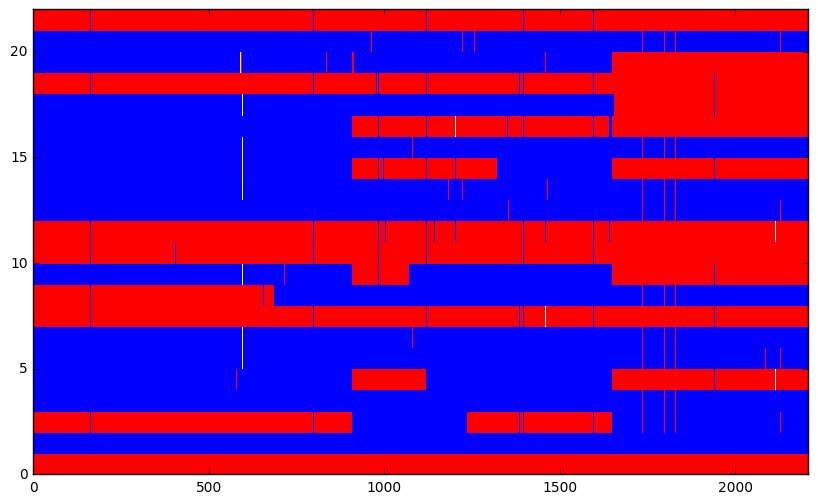

In [36]:
# take a look...
fig, ax = plt.subplots(figsize=(10, 6))
ax.pcolormesh(inh_mat[::100].T, cmap=mpl.colors.ListedColormap(['w', 'r', 'b']))
ax.autoscale(axis='both', tight=True)

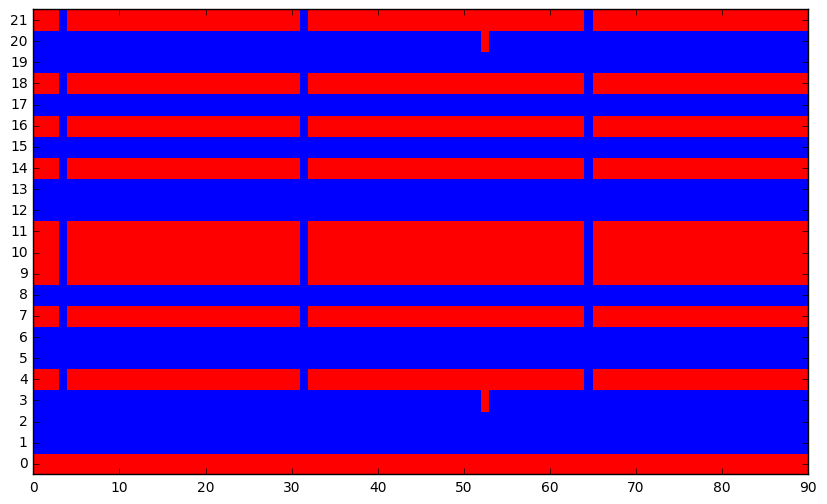

In [37]:
# take a look...
fig, ax = plt.subplots(figsize=(10, 6))
ax.pcolormesh(inh_mat[103010:103100].T, 
              cmap=mpl.colors.ListedColormap(['w', 'r', 'b']),
              vmin=0, vmax=2)
ax.set_yticks(np.arange(inh_mat.shape[1])+.5)
ax.set_yticklabels(np.arange(inh_mat.shape[1]))
ax.autoscale(axis='both', tight=True)

In [38]:
g_mat_het_phased_parent[103010:103100]

,0,1,2,3,4,...,17,18,19,20,21
0,1/0,0/0,0/0,0/0,1/0,...,0/0,1/0,0/0,0/0,1/0
1,2/0,0/0,0/0,0/0,2/0,...,0/0,2/0,0/0,0/0,2/0
2,1/0,0/0,0/0,0/0,1/0,...,0/0,1/0,0/0,0/0,1/0
3,1/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0
4,1/0,0/0,0/0,0/0,1/0,...,0/0,1/0,0/0,0/0,1/0
